In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Input, Dropout, Flatten, Activation, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.applications.resnet import ResNet50


In [2]:
# Import images
imgsPath = "E:/pycharmik/number recognition/images"
cnt = 0
images = []
classes = []
classesList = os.listdir(imgsPath)
print(f"Detected {len(classesList)} classes:")

#loading img
for i in range (0, len(classesList)):
    imgList = os.listdir(imgsPath+"/"+str(i))
    #print(imgList, end=" ")
    for img in imgList:
        imgPath = cv2.imread(imgsPath + "/" + str(i) + "/" + img)
        imgPath = cv2.resize(imgPath, (32,32))
        #print(imgPath, end=" ")
        images.append(imgPath)
        classes.append(i)
    print(i, end= " ")
print("")
print("")
print("Total images       =", len(images))
print("Total images of 0  =", len([x for x in classes if x==0]))
print("Total images of 1  =", len([x for x in classes if x==1]))
print("Total images of 2  =", len([x for x in classes if x==2]))
print("Total images of 3  =", len([x for x in classes if x==3]))
print("Total images of 4  =", len([x for x in classes if x==4]))
print("Total images of 5  =", len([x for x in classes if x==5]))
print("Total images of 6  =", len([x for x in classes if x==6]))
print("Total images of 7  =", len([x for x in classes if x==7]))
print("Total images of 8  =", len([x for x in classes if x==8]))
print("Total images of 9  =", len([x for x in classes if x==9]))

Detected 10 classes:
0 1 2 3 4 5 6 7 8 9 

Total images       = 10160
Total images of 0  = 1016
Total images of 1  = 1016
Total images of 2  = 1016
Total images of 3  = 1016
Total images of 4  = 1016
Total images of 5  = 1016
Total images of 6  = 1016
Total images of 7  = 1016
Total images of 8  = 1016
Total images of 9  = 1016


In [4]:
# Prepare data
images = np.array(images)
classes = np.array(classes)
print(images.shape)
print(classes.shape)

(10160, 32, 32, 3)
(10160,)


In [5]:
# Split data to train/test/val (60/20/20)

X_train, X_test, Y_train, Y_test = train_test_split(images, classes, test_size = 0.2) #train test
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2) #train val
print("Train: ", X_train.shape)
print("Test: ", X_test.shape)
print("Val: ", X_val.shape)

Train:  (6502, 32, 32, 3)
Test:  (2032, 32, 32, 3)
Val:  (1626, 32, 32, 3)


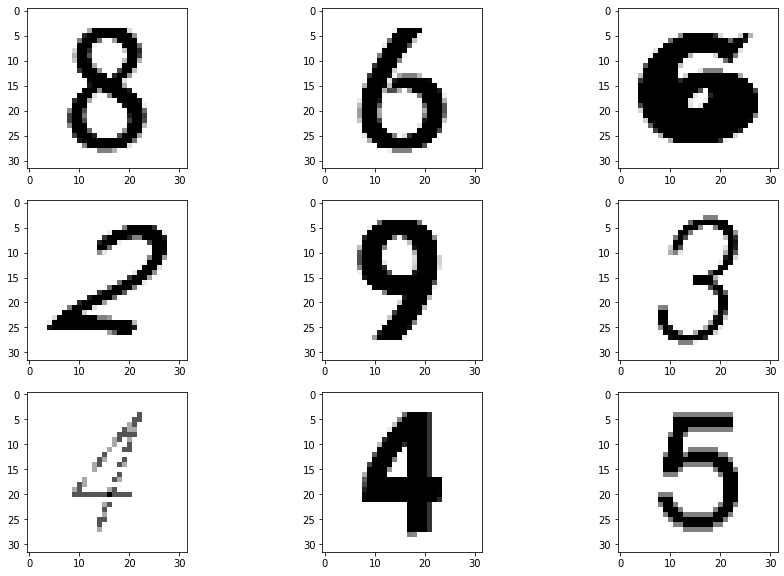

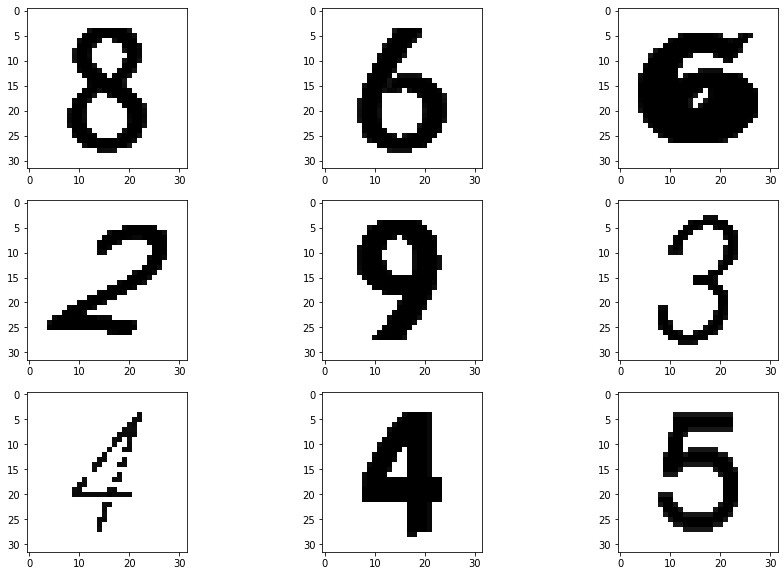

In [6]:
# Image preprocessing
def Preprocessing(img):
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgHist = cv2.equalizeHist(imgGray)
    imgHist = imgHist/255
    #imgCanny = cv2.Canny(imgGray, 10, 250)
    #imgCanny = cv2.resize(imgCanny,(100,100))
    #imgHist = cv2.resize(imgHist,(100,100))
    #cv2.imshow("Gray", imgGray)
    #cv2.imshow("Canny", edge)
    #cv2.imshow("Preprocesssed", imgHist)
    return imgHist

if 0:
    random_num = random.randint(0, 379)
    for i in range(0, 379):
        img = Preprocessing(X_train[i])
        cv2.imshow("Preprocesssed", img)
        key = cv2.waitKey(100)
        if key == 27:
            cv2.destroyAllWindows()
            break

if 1:
    plt.figure(figsize = (15,10))
    for i in range(9):
        # random_num = random.randint(0, 379)
        #img = X_train[random_num]
        imgGray = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY)
        #imgGray = imgGray.astype('uint8')
        plt.subplot(330 + i + 1)
        plt.imshow(imgGray, cmap="gray")

if 1:
    plt.figure(figsize = (15,10))
    for i in range(9):
        #random_num = random.randint(0, 379)
        #img = Preprocessing(X_train[random_num])
        img = Preprocessing(X_train[i])
        #img = img.astype('uint8')
        plt.subplot(330 + i + 1)
        plt.imshow(img, cmap="gray")


In [7]:
X_train= np.array(list(map(Preprocessing,X_train)))
X_test= np.array(list(map(Preprocessing,X_test)))
X_val= np.array(list(map(Preprocessing,X_val)))

print(X_train)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 ...

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]


In [8]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2],1)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(6502, 32, 32, 1)
(2032, 32, 32, 1)
(1626, 32, 32, 1)


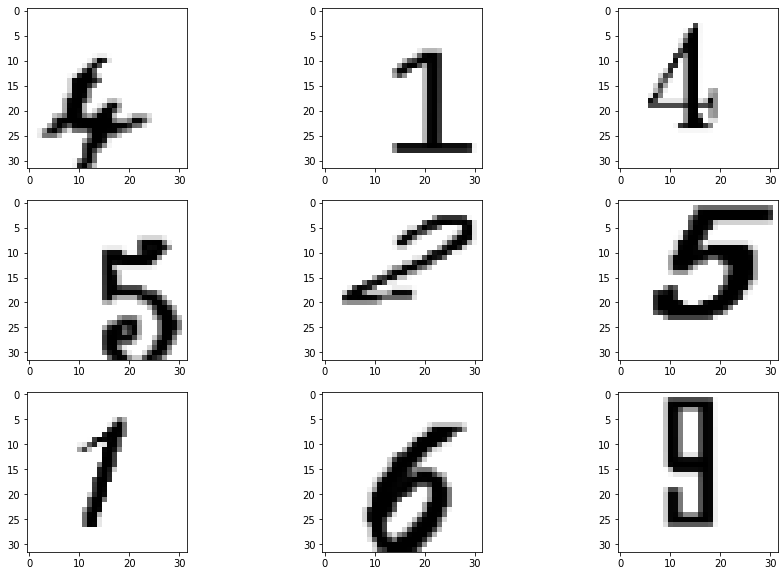

In [9]:
#augmentacja

datagen = ImageDataGenerator(   width_shift_range=0.2, 
                                height_shift_range=0.2,
                                zoom_range = 0.2,
                                shear_range = 0.2)
iterator = datagen.flow(X_train, batch_size = 1)

if 1:
    plt.figure(figsize = (15,10))
    for i in range(9):
        plt.subplot(330 + i + 1)
        batch = iterator.next()
        img = batch[0]
        plt.imshow(img, cmap="gray")
    plt.show()

datagen.fit(X_train)

In [10]:
# Change list to matrix
Y_train = to_categorical(Y_train, len(classesList))
Y_test = to_categorical(Y_test, len(classesList))
Y_val = to_categorical(Y_val, len(classesList))
print(Y_train)
print(Y_train[0])
print(Y_train[1])

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [15]:
# Create model
model = Sequential()
model.add((Conv2D(60,(5, 5), input_shape=(32, 32, 1), activation='relu')))
model.add((Conv2D(60, (5, 5), activation='relu')))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add((Conv2D(30, (3, 3), activation='relu')))
model.add((Conv2D(30, (3, 3), activation='relu')))
model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classesList), activation='softmax'))

optimizer = Adam(learning_rate=0.002)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 60)        1560      
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 60)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                  

In [16]:
# Start the training

model_hist = model.fit(datagen.flow(X_train,Y_train,
                                 batch_size = 32),
                                 epochs = 10,
                                 validation_data=(X_val,Y_val),
                                 shuffle=1)


Epoch 1/10
204/204 [==============================] - 27s 129ms/step - loss: 1.3910 - accuracy: 0.4986 - val_loss: 0.1527 - val_accuracy: 0.9459
Epoch 2/10
204/204 [==============================] - 27s 134ms/step - loss: 0.3945 - accuracy: 0.8710 - val_loss: 0.0838 - val_accuracy: 0.9729
Epoch 3/10
204/204 [==============================] - 28s 139ms/step - loss: 0.2553 - accuracy: 0.9179 - val_loss: 0.0759 - val_accuracy: 0.9766
Epoch 4/10
204/204 [==============================] - 28s 137ms/step - loss: 0.2042 - accuracy: 0.9343 - val_loss: 0.0748 - val_accuracy: 0.9766
Epoch 5/10
204/204 [==============================] - 28s 135ms/step - loss: 0.1801 - accuracy: 0.9422 - val_loss: 0.0515 - val_accuracy: 0.9840
Epoch 6/10
204/204 [==============================] - 27s 134ms/step - loss: 0.1611 - accuracy: 0.9491 - val_loss: 0.0497 - val_accuracy: 0.9852
Epoch 7/10
204/204 [==============================] - 26s 129ms/step - loss: 0.1518 - accuracy: 0.9505 - val_loss: 0.0406 - val_ac

In [17]:
# Results
results = model.evaluate(X_train, Y_train)
print("train loss, train accuracy:", results)
results_test = model.evaluate(X_test, Y_test)
print("test loss, test accuracy:", results_test)
print("-------------------------------------------------------------")
print("Dokładność modelu na treningowym zbiorze wynosi: %.3f "% results[1])
print("Dokładność modelu na testowym zbiorze wynosi: %.3f"% results_test[1])
print("-------------------------------------------------------------")

204/204 [==============================] - 6s 32ms/step - loss: 0.0343 - accuracy: 0.9889
train loss, train accuracy: [0.03432557359337807, 0.9889264702796936]
64/64 [==============================] - 2s 35ms/step - loss: 0.0433 - accuracy: 0.9847
test loss, test accuracy: [0.04328469932079315, 0.9847440719604492]
-------------------------------------------------------------
Dokładność modelu na treningowym zbiorze wynosi: 0.989 
Dokładność modelu na testowym zbiorze wynosi: 0.985
-------------------------------------------------------------


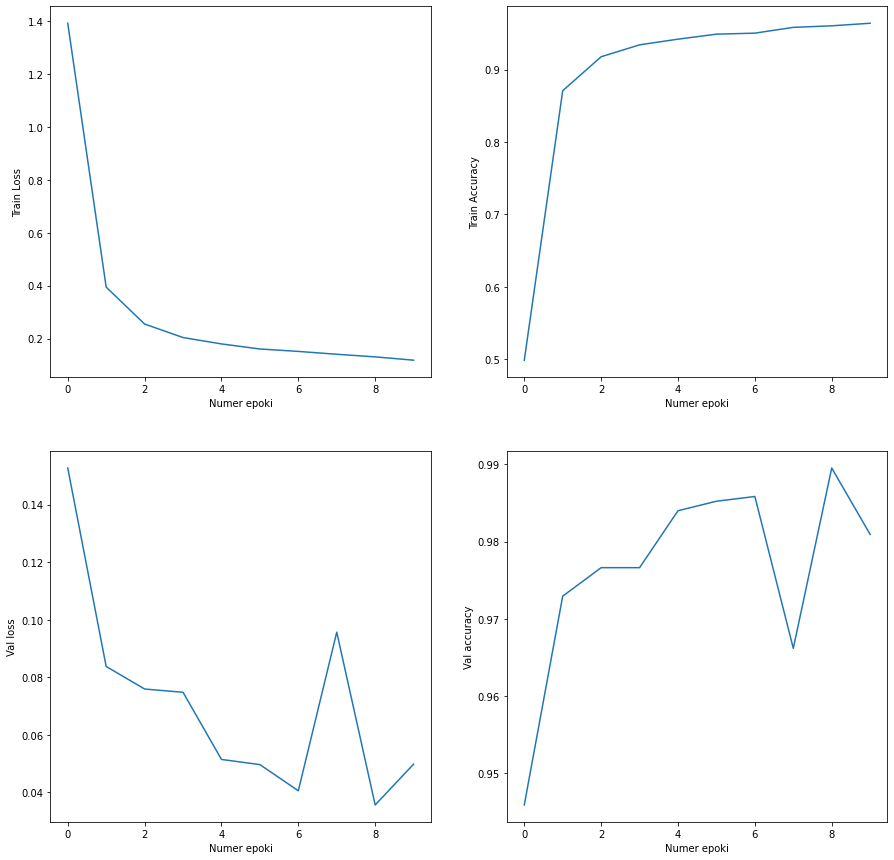

In [18]:
def model_evaluate(train_loss, train_accuracy, val_loss, val_accuracy): 
    
    fig, axs = plt.subplots(2, 2)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    
    axs[0,0].set_xlabel('Numer epoki')
    axs[0,0].set_ylabel('Train Loss')
    axs[0,0].plot(train_loss)

    axs[0,1].set_xlabel('Numer epoki')
    axs[0,1].set_ylabel('Train Accuracy')
    axs[0,1].plot(train_accuracy)
    
    axs[1,0].set_xlabel('Numer epoki')
    axs[1,0].set_ylabel('Val loss')
    axs[1,0].plot(val_loss)

    axs[1,1].set_xlabel('Numer epoki')
    axs[1,1].set_ylabel('Val accuracy')
    axs[1,1].plot(val_accuracy) 
    plt.show()

train_loss = model_hist.history['loss'] 
train_acc = model_hist.history['accuracy'] 

val_loss = model_hist.history['val_loss']
val_accuracy = model_hist.history['val_accuracy']

model_evaluate(train_loss, train_acc, val_loss, val_accuracy) 

In [19]:
# Save model
model.save('trained_model.h5')